# **importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from spacy import displacy
spacy.load('en_core_web_sm')
nlp = spacy.load('en_core_web_sm')
import os
import pandas as pd
import seaborn as sns
import re
import string
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.tokenize import  word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer  
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import SGDClassifier

from sklearn.utils import shuffle

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Download dataset from kaggle**
https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/kaggle_dataset/amazon_alexa.tsv', sep ='\t')
data.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


# **Exploring Data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
data['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


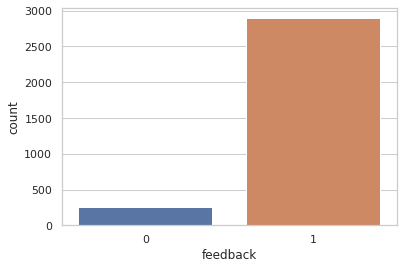

In [ ]:
sns.countplot(data['feedback'], label='count')

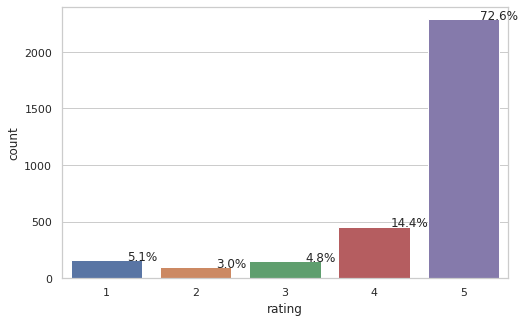

In [ ]:
#exploring of "rating" Variable
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(data))
ax = sns.countplot(x="rating", data=data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [ ]:
#  data's categories
categories= pd.DataFrame(data['rating'].apply(lambda x: 1 if (x >= 3) else 0) ).to_numpy()
categories

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
#create new  column called sentiment and store the pos for rate over 3 and negaive for the rest 
data['sentiment']= data['rating'].apply(lambda x: "Positive" if (x >= 3) else "Negative") 
data.head(10)

,rating,date,variation,verified_reviews,feedback,sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Positive
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Positive
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,Positive
4,5,31-Jul-18,Charcoal Fabric,Music,1,Positive
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,Positive
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,Positive
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,Positive
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,Positive
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,Positive


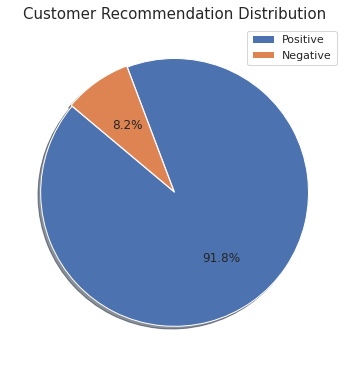

In [ ]:
plt.figure(figsize=(6, 7))

explode = [0, 0.01]
plt.pie(data['sentiment'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['Positive', 'Negative'])
plt.title('Customer Recommendation Distribution', fontsize=15)
plt.axis('off');

**there** ***ara imbalanced data***



# **Data Formating**

In [ ]:
data.drop(["rating",	"date"	,"variation"	,"feedback"], axis=1, inplace=True)
data


,verified_reviews,sentiment
0,Love my Echo!,Positive
1,Loved it!,Positive
2,"Sometimes while playing a game, you can answer...",Positive
3,I have had a lot of fun with this thing. My 4 ...,Positive
4,Music,Positive
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",Positive
3146,"Listening to music, searching locations, check...",Positive
3147,"I do love these things, i have them running my...",Positive
3148,Only complaint I have is that the sound qualit...,Positive


# **NER,POS and DEPENDENCY**

In [ ]:
def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))
def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
def normalize( text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)   
    return ''.join(text)


In [ ]:
Reviews= data['verified_reviews'].apply(normalize)
Reviews[0]

'love my echo'

In [ ]:
Reviews_as_one_string=" ".join(Reviews)

# **NER**

In [ ]:
doc=nlp(Reviews_as_one_string)
for ent in doc.ents:
    print(ent.text, "|", ent.label_)

5th | ORDINAL
85 year old | DATE
a couple of days | DATE
2nd | ORDINAL
a few days | DATE
second | ORDINAL
the 1st | DATE
two | CARDINAL
3 | CARDINAL
first | ORDINAL
first | ORDINAL
1st | ORDINAL
first | ORDINAL
camelot | LOC
camelot | LOC
7000 | CARDINAL
2nd | ORDINAL
83 | DATE
first | ORDINAL
1 | CARDINAL
2 | CARDINAL
one | CARDINAL
an hour | TIME
1 | CARDINAL
a million | CARDINAL
italian | NORP
5 | CARDINAL
7 | CARDINAL
45 | CARDINAL
5 | CARDINAL
5 | CARDINAL
5 | CARDINAL
first | ORDINAL
2nd | ORDINAL
about a week | DATE
the morning | TIME
only a week | DATE
this afternoon | TIME
two | CARDINAL
2nd | ORDINAL
minutes | TIME
wifi controller | PERSON
wifi | PERSON
rememberi | PERSON
2 weeks | DATE
one | CARDINAL
6 hours later | TIME
four | CARDINAL
two | CARDINAL
2nd | ORDINAL
the 1st | DATE
2nd | ORDINAL
only two | CARDINAL
1 | CARDINAL
english | LANGUAGE
second | ORDINAL
korea | GPE
2 | CARDINAL
this year | DATE
one | CARDINAL
100 | CARDINAL
third | ORDINAL
every penny | MONEY
3 | CAR

In [ ]:
document = nlp(Reviews_as_one_string)
data_removal_ner=print(" ".join([ent.text for ent in document if not ent.ent_type_]))
data_removal_ner

love my echo loved it sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well music i received the echo as a gift i needed another bluetooth or something to play music easily accessible and found this smart speaker ca nt wait to see what else it can do without having a cellphone i can not use many of her features i have an ipad but do not see that of any use it is a great alarm if u r almost deaf you can hear her alarm in the bedroom from out in the living room so that is reason enough to keep herit is fun to ask random questions to hear her response she does not seem to be very smartbon politics yet i think this is the one i ve purchased i m working on getting one in every room of my h

# **pos**

In [ ]:
# pos=nltk.pos_tag(nltk.word_tokenize(Reviews_as_one_string))
# pos
# OR
clean_tok=word_tokenize(Reviews_as_one_string)
pos_tags = nltk.pos_tag(clean_tok)
pos_tags

[('love', 'VB'),
 ('my', 'PRP$'),
 ('echo', 'NN'),
 ('loved', 'VBD'),
 ('it', 'PRP'),
 ('sometimes', 'RB'),
 ('while', 'IN'),
 ('playing', 'VBG'),
 ('a', 'DT'),
 ('game', 'NN'),
 ('you', 'PRP'),
 ('can', 'MD'),
 ('answer', 'VB'),
 ('a', 'DT'),
 ('question', 'NN'),
 ('correctly', 'RB'),
 ('but', 'CC'),
 ('alexa', 'VBP'),
 ('says', 'VBZ'),
 ('you', 'PRP'),
 ('got', 'VBD'),
 ('it', 'PRP'),
 ('wrong', 'JJ'),
 ('and', 'CC'),
 ('answers', 'VBZ'),
 ('the', 'DT'),
 ('same', 'JJ'),
 ('as', 'IN'),
 ('you', 'PRP'),
 ('i', 'VBP'),
 ('like', 'IN'),
 ('being', 'VBG'),
 ('able', 'JJ'),
 ('to', 'TO'),
 ('turn', 'VB'),
 ('lights', 'NNS'),
 ('on', 'IN'),
 ('and', 'CC'),
 ('off', 'IN'),
 ('while', 'IN'),
 ('away', 'RB'),
 ('from', 'IN'),
 ('home', 'NN'),
 ('i', 'NN'),
 ('have', 'VBP'),
 ('had', 'VBN'),
 ('a', 'DT'),
 ('lot', 'NN'),
 ('of', 'IN'),
 ('fun', 'NN'),
 ('with', 'IN'),
 ('this', 'DT'),
 ('thing', 'NN'),
 ('my', 'PRP$'),
 ('4', 'CD'),
 ('yr', 'RB'),
 ('old', 'JJ'),
 ('learns', 'NNS'),
 ('about',

# **DEPENDENCY**

In [ ]:
DP = nlp(Reviews_as_one_string)
displacy.render(DP, style='ent', jupyter=True)
#sent = list(DP.sents)[1]
#displacy.render(sent, style='dep', jupyter=True ,options={'distance': 80})

# **Pre-Processing Data**

In [ ]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))

def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)

def remove_whitespaces(text):
    return text.strip()

def remove_stopwords(words, stop_words):
    """
    :param words:
    :type words:
    :param stop_words: from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    or
    from spacy.lang.en.stop_words import STOP_WORDS
    :type stop_words:
    :return:
    :rtype:
    """
    return [word for word in words if word not in stop_words]

def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
  return word_tokenize(text)

def normalize_text( text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

In [ ]:
data_clean = data['verified_reviews'].apply(normalize_text)
data_clean[1]

'love'

# **Final Data**

In [ ]:
data["final_text"]=data_clean
data

,verified_reviews,sentiment,final_text
0,Love my Echo!,Positive,love echo
1,Loved it!,Positive,love
2,"Sometimes while playing a game, you can answer...",Positive,sometimes play game answer question correctly ...
3,I have had a lot of fun with this thing. My 4 ...,Positive,lot fun thing yr old learn dinosaur control li...
4,Music,Positive,music
...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",Positive,perfect kid adult everyone
3146,"Listening to music, searching locations, check...",Positive,listen music search location check time look w...
3147,"I do love these things, i have them running my...",Positive,love thing run entire home tv light thermostat...
3148,Only complaint I have is that the sound qualit...,Positive,complaint sound quality isnt great mostly use ...


# **Vectoraization**

# **`TF-IDF`**

In [ ]:
tfidf=TfidfVectorizer(max_features=2500)
x=data_clean
y=data['sentiment']

In [ ]:
X=tfidf.fit_transform(x)
X

<3150x2500 sparse matrix of type '<class 'numpy.float64'>'
	with 35237 stored elements in Compressed Sparse Row format>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **SVC**

In [ ]:
clf = LinearSVC()
clf.fit(X_train,y_train)

LinearSVC()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
pd.crosstab(y_test,y_pred)

0.9417989417989417
              precision    recall  f1-score   support

    Negative       0.88      0.43      0.58        88
    Positive       0.94      0.99      0.97       857

    accuracy                           0.94       945
   macro avg       0.91      0.71      0.77       945
weighted avg       0.94      0.94      0.93       945



col_0,Negative,Positive
sentiment,,
Negative,38,50
Positive,5,852


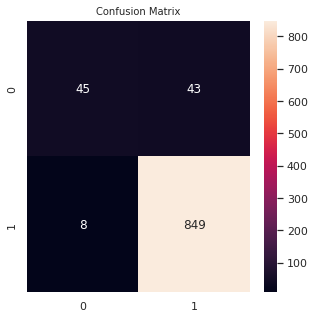

In [ ]:
svm = SGDClassifier(loss='hinge')
svm.fit(X_train, y_train)
y_pred=svm.predict(X_test)
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=10);

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[ 45  43]
 [  8 849]]


In [ ]:
print(accuracy_score(y_test,y_pred))

0.946031746031746


In [ ]:

text="Love my Echo. Still learning how every thing works but having tons of fun."

get=normalize_text(text)
vec=tfidf.transform([text])
vec.shape

(1, 2500)

In [ ]:
clf.predict(vec)

array(['Positive'], dtype=object)

# **SMOTE(Handling imblanced data)**

In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)



In [ ]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))


Before SMOTE : Counter({'Positive': 2036, 'Negative': 169})
After SMOTE : Counter({'Positive': 2036, 'Negative': 2036})


In [ ]:
clf.fit(X_train_smote,y_train_smote)
y_predict = clf.predict(X_test)
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.8984126984126984
              precision    recall  f1-score   support

    Negative       0.47      0.76      0.58        88
    Positive       0.97      0.91      0.94       857

    accuracy                           0.90       945
   macro avg       0.72      0.84      0.76       945
weighted avg       0.93      0.90      0.91       945



col_0,Negative,Positive
sentiment,,
Negative,67,21
Positive,75,782


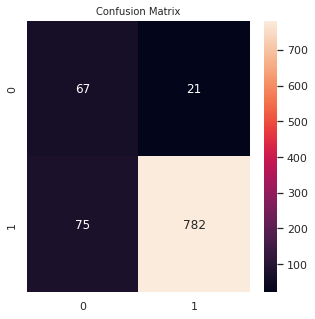

In [ ]:
svm = SGDClassifier(loss='hinge')
svm.fit(X_train, y_train)
y_pred=svm.predict(X_test)
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=10);


In [ ]:
print(confusion_matrix(y_test,y_predict))

[[ 67  21]
 [ 75 782]]


In [ ]:
print(accuracy_score(y_test,y_predict))

0.8984126984126984


# **Test Model**

In [ ]:
text="Sound is terrible if u want good music too get a bose"

get=normalize_text(text)
vec=tfidf.transform([text])
vec.shape

(1, 2500)

In [ ]:
clf.predict(vec)

array(['Negative'], dtype=object)

# **Save Model**

In [ ]:
#  import pickle 
#  pickle.dump(clf,open('model','wb'))